In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

import seaborn as sns

# Q3

In [13]:
#Ensembles

prio_ensemble = pd.read_json("Trec_data/prioScoreDF.json")
#cat_ensemble = pd.read_json("Trec_data/catScoreDF.json")

## Priority

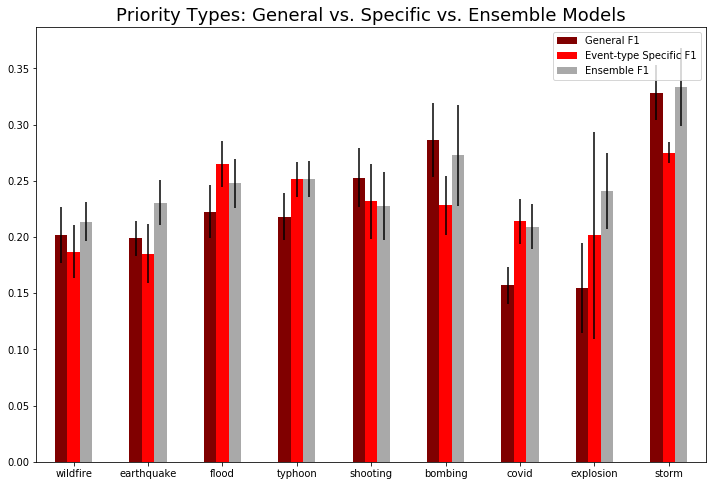

In [14]:
plt.figure(figsize=(12, 8))
ax = plt.axes()

genF1 = [item for item in prio_ensemble['avgF1Gen']]
specF1 = [item for item in prio_ensemble['avgF1Spec']]
ensF1 = [item for item in prio_ensemble['avgF1Ens']]
ste_gen = [item for item in prio_ensemble['semF1Gen']]
ste_spec = [item for item in prio_ensemble['semF1Spec']]
ste_ens = [item for item in prio_ensemble['semF1Ens']]
index = [item for item in prio_ensemble.index]

df_prio = pd.DataFrame({'General F1': genF1, 'Event-type Specific F1': specF1,

                   'Ensemble F1': ensF1}, index=index)

ax.set_title('Priority Types: General vs. Specific vs. Ensemble Models', fontsize = 18)
ax = df_prio.plot.bar(rot=0, ax=ax, yerr = [ste_gen, ste_spec, ste_ens], 
                      color=['maroon', 'red', 'darkgrey'])

plt.show()

In [15]:
#DataFrame with only one priority type
def isolate(frame, priority_type):
    drop_list = []
    newDF = frame
    
    for i in frame.columns.tolist():
        if i.find(priority_type) == -1:
            drop_list.append(i)
            
    newDF = newDF.drop(columns=drop_list)
    return newDF

def visualize(prioDF, priority_type):
    DF = isolate(prioDF, priority_type)
    
    plt.figure(figsize=(12, 8))
    ax = plt.axes()
    
    genF1 = [item for item in DF['avgF1Gen' + priority_type]]
    specF1 = [item for item in DF['avgF1Spec' + priority_type]]
    ensF1 = [item for item in DF['avgF1Ens' + priority_type]]
    ste_gen = [item for item in DF['semF1Gen' + priority_type]]
    ste_spec = [item for item in DF['semF1Spec' + priority_type]]
    ste_ens = [item for item in DF['semF1Ens' + priority_type]]
    index = [item for item in DF.index]

    df_prio = pd.DataFrame({'General F1': genF1, 'Event-type Specific F1': specF1,

                       'Ensemble F1': ensF1}, index=index)

    ax.set_title(priority_type + ' Priority Types: General vs. Specific vs. Ensemble Models', fontsize = 18)
    ax = df_prio.plot.bar(rot=0, ax=ax, yerr = [ste_gen, ste_spec, ste_ens], 
                                  color=['maroon', 'red', 'darkgrey'])

    plt.show()

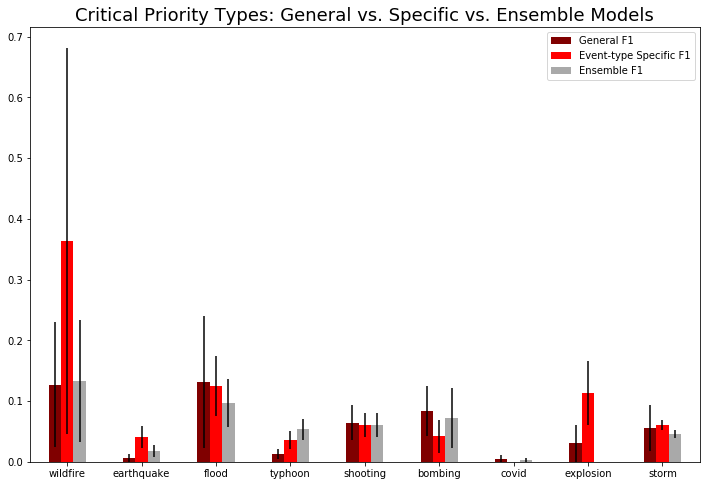

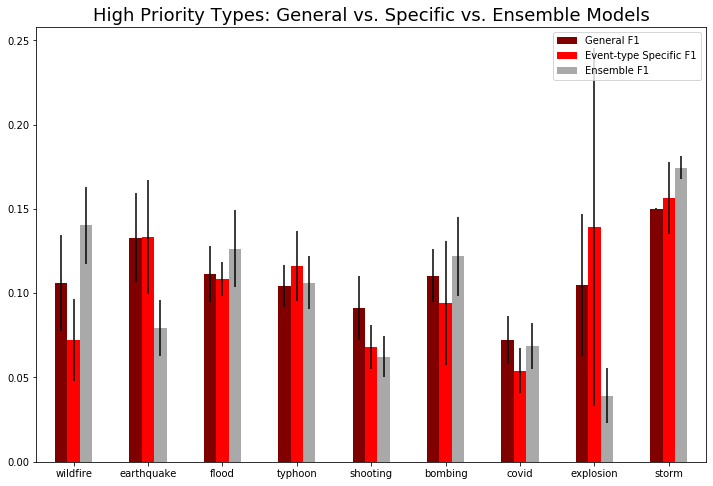

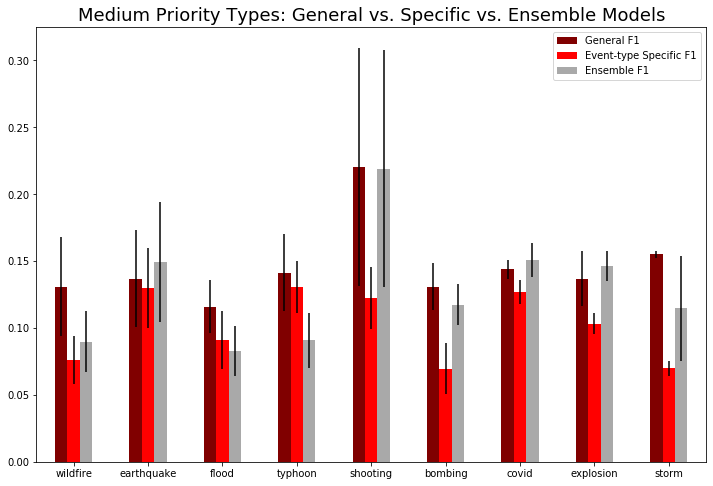

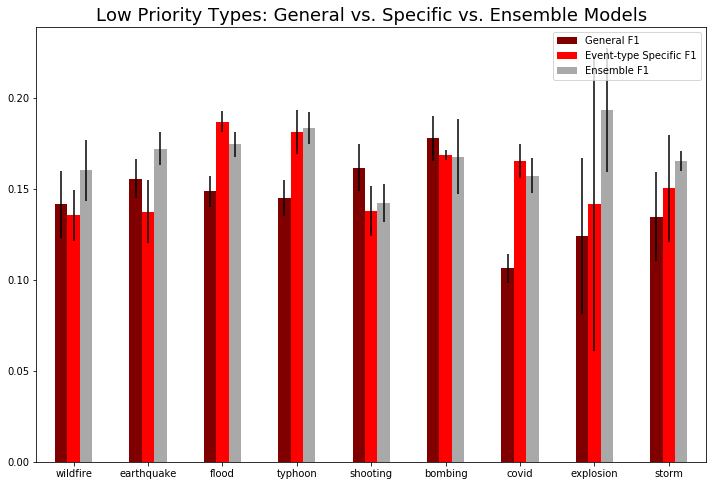

In [16]:
visualize(prio_ensemble, "Critical")
visualize(prio_ensemble, "High")
visualize(prio_ensemble, "Medium")
visualize(prio_ensemble, "Low")

## Categories

In [23]:
cat_ensemble.columns

Index(['genScores', 'specScores', 'avgAccGen', 'avgAccSpec', 'avgF1Gen',
       'avgF1Spec', 'semAccGen', 'semAccSpec', 'semF1Gen', 'semF1Spec',
       'ensScores', 'avgAccEns', 'avgF1Ens', 'semAccEns', 'semF1Ens'],
      dtype='object')

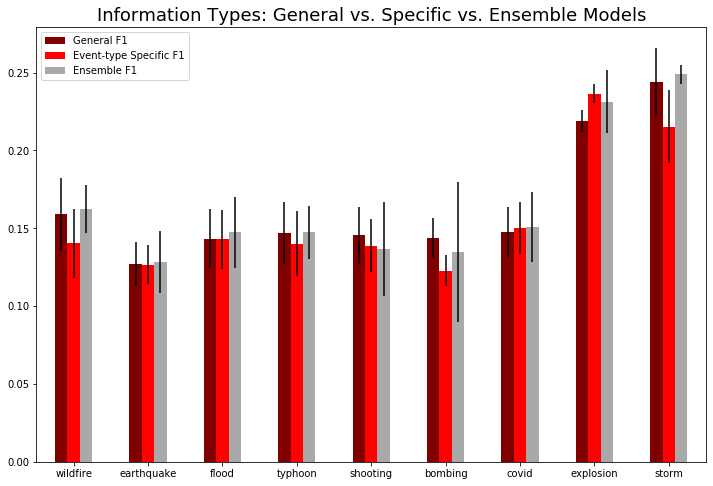

In [27]:
def visualize_cat(catDF):    
    plt.figure(figsize=(12, 8))
    ax = plt.axes()
    
    genF1 = [item for item in catDF['avgF1Gen']]
    specF1 = [item for item in catDF['avgF1Spec']]
    ensF1 = [item for item in catDF['avgF1Ens']]
    ste_gen = [item for item in catDF['semF1Gen']]
    ste_spec = [item for item in catDF['semF1Spec']]
    ste_spec = [item for item in catDF['semF1Ens']]
    index = [item for item in catDF.index]

    df_prio = pd.DataFrame({'General F1': genF1,

                   'Event-type Specific F1': specF1, 'Ensemble F1': ensF1}, index=index)

    ax.set_title('Information Types: General vs. Specific vs. Ensemble Models', fontsize = 18)
    ax = df_prio.plot.bar(rot=0, ax=ax, yerr = [ste_gen, ste_spec, ste_ens], 
                          color=['maroon', 'red', 'darkgrey'])

    plt.show()

visualize_cat(cat_ensemble)

## Per-event

In [2]:
typhoon = pd.read_json("Trec_data/typhoonEnsScoreDf.json")
storm = pd.read_json("Trec_data/stormEnsScoreDf.json")
flood = pd.read_json("Trec_data/floodEnsScoreDf.json")
wildfire = pd.read_json("Trec_data/wildfireEnsScoreDf.json")
earthquake = pd.read_json("Trec_data/earthquakeEnsScoreDf.json")
explosion = pd.read_json("Trec_data/explosionEnsScoreDf.json")
bombing = pd.read_json("Trec_data/bombingEnsScoreDf.json")
shooting = pd.read_json("Trec_data/shootingEnsScoreDf.json")
covid = pd.read_json("Trec_data/covidEnsScoreDf.json")

,ensScores,ensLabelScores,avgF1Ens,avgF1EnsLow,avgF1EnsMedium,avgF1EnsHigh,avgF1EnsCritical,semF1Ens,semF1EnsLow,semF1EnsMedium,...,avgAccEns,avgAccEnsLow,avgAccEnsMedium,avgAccEnsHigh,avgAccEnsCritical,semAccEns,semAccEnsLow,semAccEnsMedium,semAccEnsHigh,semAccEnsCritical
typhoon,"[[0.4607843137, 0.34521425710000003, 0.5744012...","[{'Medium': [0.41577825160000004, 0.6116504854...",0.207510,0.152482,0.165054,0.045821,0.000000,0.019858,0.010078,0.008859,...,0.418479,0.449664,0.436373,0.099577,0.000000,0.030533,0.041922,0.028384,0.027599,0.000000
earthquake,"[[0.46164936560000003, 0.2835402483, 0.5575186...","[{'Low': [0.4965239663, 0.2721545569, 0.674458...",0.208945,0.157335,0.150870,0.068738,0.002717,0.019966,0.009485,0.012420,...,0.421423,0.469161,0.368191,0.150021,0.005556,0.025233,0.040302,0.040318,0.032317,0.005556
earthquake_bombing,"[[0.449538639, 0.2575090108, 0.5535924617, 0.4...","[{'Low': [0.477863154, 0.24149517010000002, 0....",0.200759,0.147436,0.157093,0.062052,0.000000,0.021248,0.009874,0.012563,...,0.391406,0.428397,0.412065,0.132079,0.000000,0.026721,0.040671,0.038387,0.035333,0.000000
typhoon_earthquake,"[[0.419550173, 0.2494993993, 0.5602669808, 0.3...","[{'Low': [0.44017563120000003, 0.2347753045, 0...",0.190920,0.132536,0.182156,0.057395,0.002717,0.022647,0.011016,0.010244,...,0.359603,0.372216,0.477145,0.121939,0.005556,0.033822,0.042899,0.022960,0.028266,0.005556
typhoon_earthquake_wildfire,"[[0.4336793541, 0.258309972, 0.556340793100000...","[{'Low': [0.45700695210000003, 0.2440151197, 0...",0.168593,0.117924,0.160903,0.057353,0.005319,0.016899,0.008415,0.005924,...,0.363027,0.374752,0.461008,0.128250,0.011111,0.033923,0.043048,0.033012,0.029316,0.011111


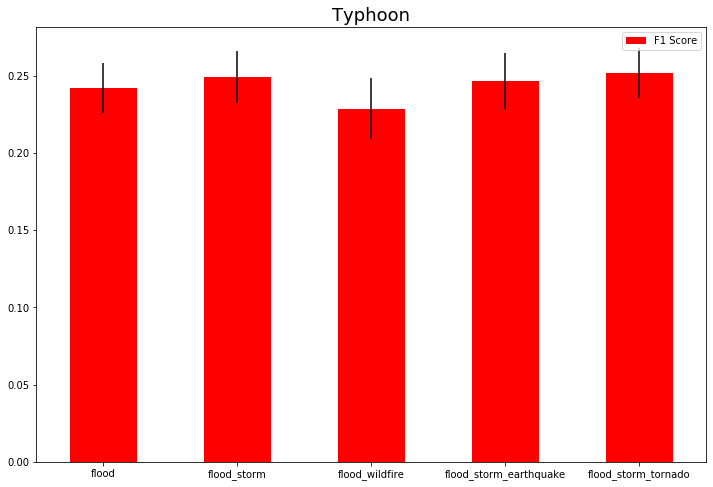

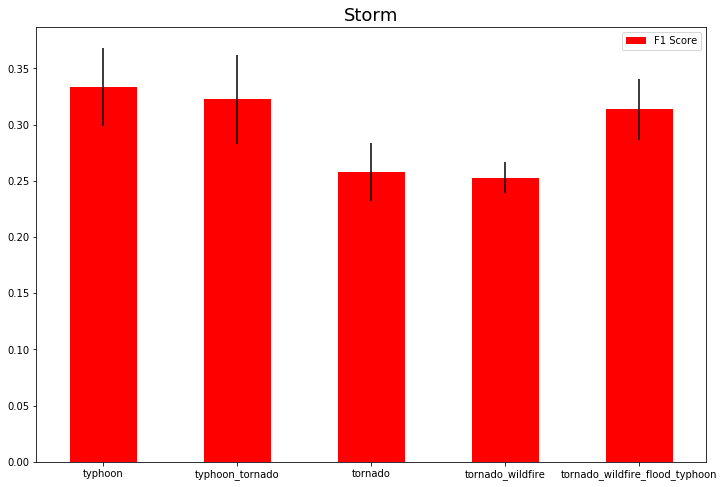

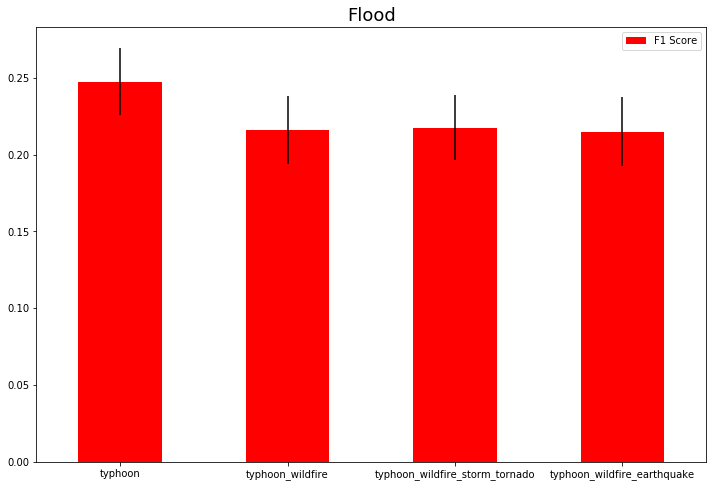

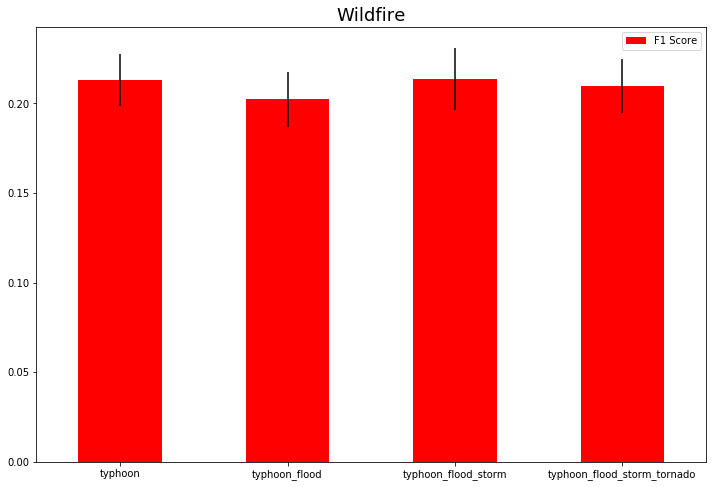

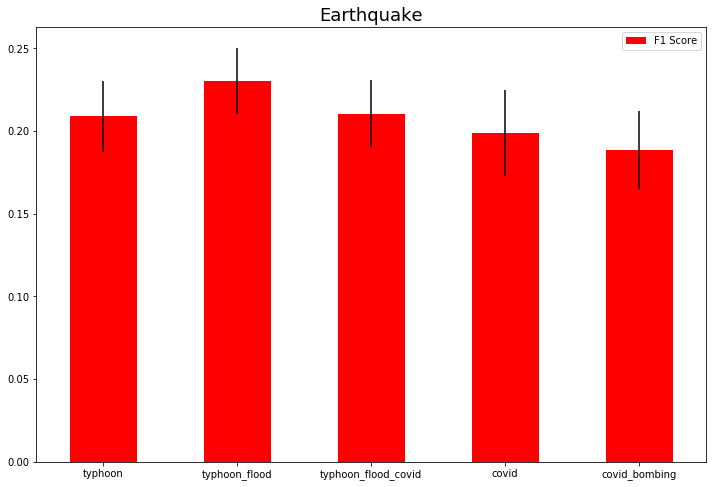

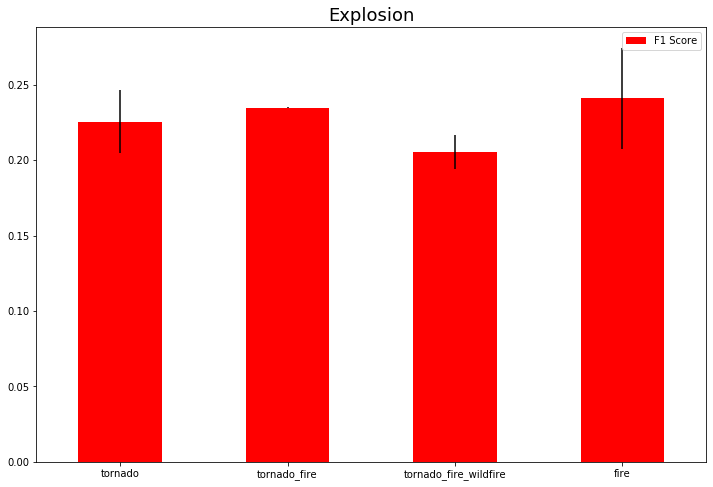

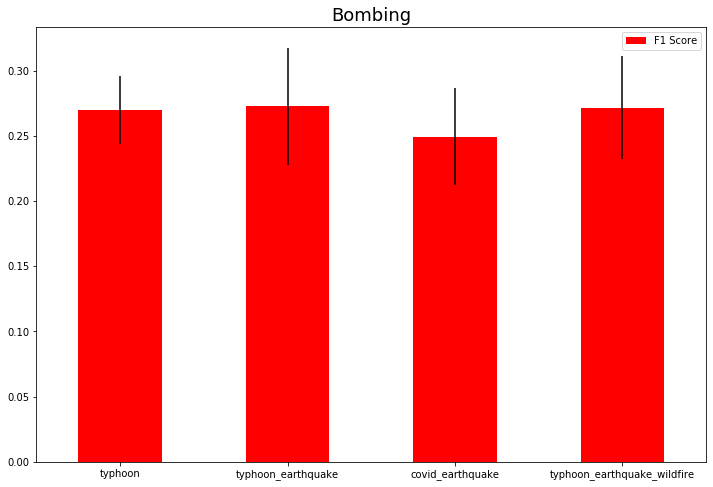

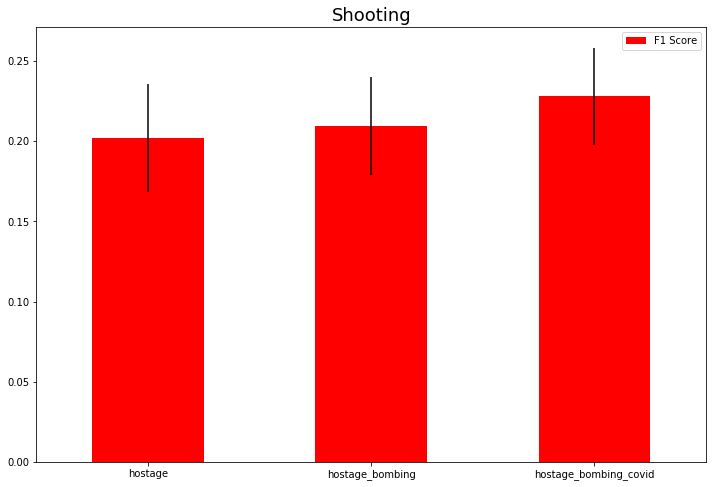

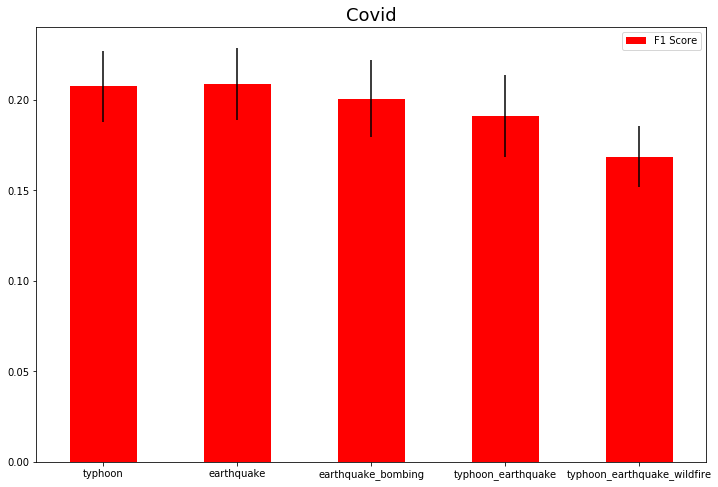

In [8]:
def visualize_ens(ensemble, title):    
    plt.figure(figsize=(12, 8))
    ax = plt.axes()
    
    F1 = [item for item in ensemble['avgF1Ens']]
    ste_ens = [item for item in ensemble['semF1Ens']]
    index = [item for item in ensemble.index]

    df_prio = pd.DataFrame({'F1 Score': F1}, index=index)

    ax.set_title(title, fontsize = 18)
    ax = df_prio.plot.bar(rot=0, ax=ax, yerr = [ste_ens], 
                          color='r')

    plt.show()

visualize_ens(typhoon, 'Typhoon')
visualize_ens(storm, 'Storm')
visualize_ens(flood, "Flood")
visualize_ens(wildfire, 'Wildfire')
visualize_ens(earthquake, 'Earthquake')
visualize_ens(explosion, 'Explosion')
visualize_ens(bombing, 'Bombing')
visualize_ens(shooting, 'Shooting')
visualize_ens(covid, 'Covid')

# Q2 Graphs

## Priority

In [3]:
prioDF = pd.read_json("prioScoreDF.json")
prioDF.columns

Index(['genScores', 'specScores', 'genLabelScores', 'specLabelScores',
       'avgF1Gen', 'avgF1GenLow', 'avgF1GenMedium', 'avgF1GenHigh',
       'avgF1GenCritical', 'avgF1Spec', 'avgF1SpecLow', 'avgF1SpecMedium',
       'avgF1SpecHigh', 'avgF1SpecCritical', 'semF1Gen', 'semF1GenLow',
       'semF1GenMedium', 'semF1GenHigh', 'semF1GenCritical', 'semF1Spec',
       'semF1SpecLow', 'semF1SpecMedium', 'semF1SpecHigh', 'semF1SpecCritical',
       'avgAccGen', 'avgAccGenLow', 'avgAccGenMedium', 'avgAccGenHigh',
       'avgAccGenCritical', 'avgAccSpec', 'avgAccSpecLow', 'avgAccSpecMedium',
       'avgAccSpecHigh', 'avgAccSpecCritical', 'semAccGen', 'semAccGenLow',
       'semAccGenMedium', 'semAccGenHigh', 'semAccGenCritical', 'semAccSpec',
       'semAccSpecLow', 'semAccSpecMedium', 'semAccSpecHigh',
       'semAccSpecCritical'],
      dtype='object')

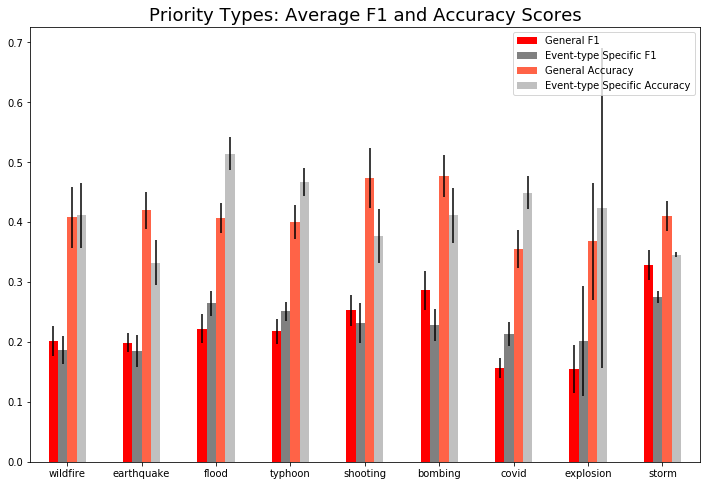

In [4]:
#visualization: birds-eye

plt.figure(figsize=(12, 8))
ax = plt.axes()

genF1 = [item for item in prioDF['avgF1Gen']]
specF1 = [item for item in prioDF['avgF1Spec']]
ste_gen = [item for item in prioDF['semF1Gen']]
ste_spec = [item for item in prioDF['semF1Spec']]
index = [item for item in prioDF.index]

genacc = [item for item in prioDF['avgAccGen']]
specacc = [item for item in prioDF['avgAccSpec']]
ste_genacc = [item for item in prioDF['semAccGen']]
ste_specacc = [item for item in prioDF['semAccSpec']]

df_prio = pd.DataFrame({'General F1': genF1,

                   'Event-type Specific F1': specF1, 'General Accuracy': genacc, 
                        
                    'Event-type Specific Accuracy': specacc}, index=index)

ax.set_title('Priority Types: Average F1 and Accuracy Scores', fontsize = 18)
ax = df_prio.plot.bar(rot=0, ax=ax, yerr = [ste_gen, ste_spec, ste_genacc, ste_specacc], 
                      color=['red', 'grey', 'tomato', 'silver'])

plt.show()

In [5]:
#DataFrame with only one priority type
def isolate(frame, priority_type):
    drop_list = []
    newDF = frame
    
    for i in prioDF.columns.tolist():
        if i.find(priority_type) == -1:
            drop_list.append(i)
            
    newDF = newDF.drop(columns=drop_list)
    return newDF

def visualize(prioDF, priority_type):
    DF = isolate(prioDF, priority_type)
    
    plt.figure(figsize=(12, 8))
    ax = plt.axes()
    
    genF1 = [item for item in DF['avgF1Gen' + priority_type]]
    specF1 = [item for item in DF['avgF1Spec' + priority_type]]
    ste_gen = [item for item in DF['semF1Gen' + priority_type]]
    ste_spec = [item for item in DF['semF1Spec' + priority_type]]
    index = [item for item in DF.index]

    genacc = [item for item in DF['avgAccGen' + priority_type]]
    specacc = [item for item in DF['avgAccSpec' + priority_type]]
    ste_genacc = [item for item in DF['semAccGen' + priority_type]]
    ste_specacc = [item for item in DF['semAccSpec' + priority_type]]

    df_prio = pd.DataFrame({'General F1': genF1,

                   'Event-type Specific F1': specF1, 'General Accuracy': genacc, 
                        
                    'Event-type Specific Accuracy': specacc}, index=index)

    ax.set_title(priority_type + ' Priority Type: Average F1 and Accuracy Scores', fontsize = 18)
    ax = df_prio.plot.bar(rot=0, ax=ax, yerr = [ste_gen, ste_spec, ste_genacc, ste_specacc], 
                      color=['red', 'grey', 'tomato', 'silver'])

    plt.show()

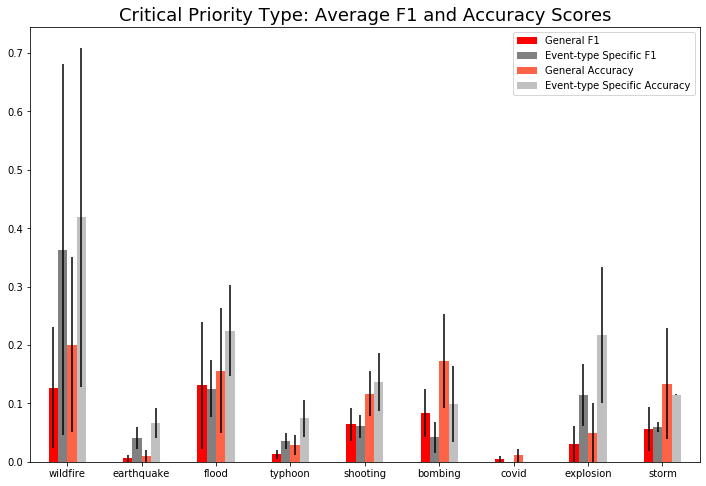

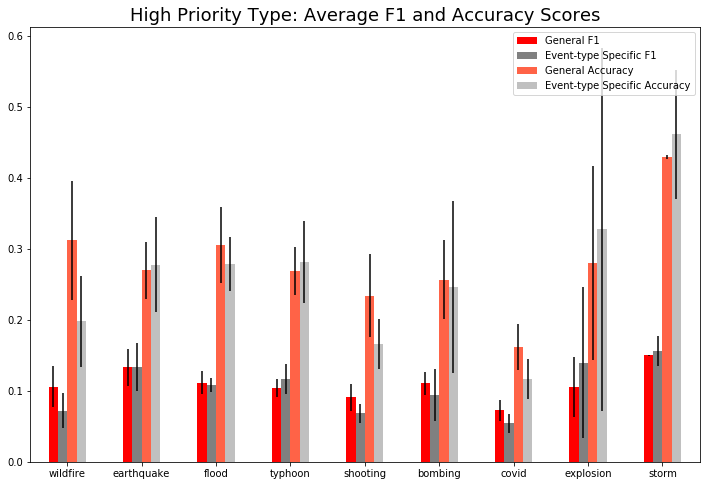

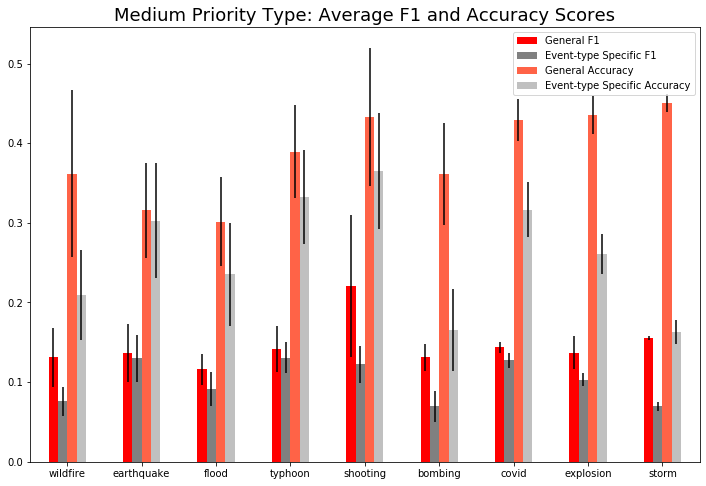

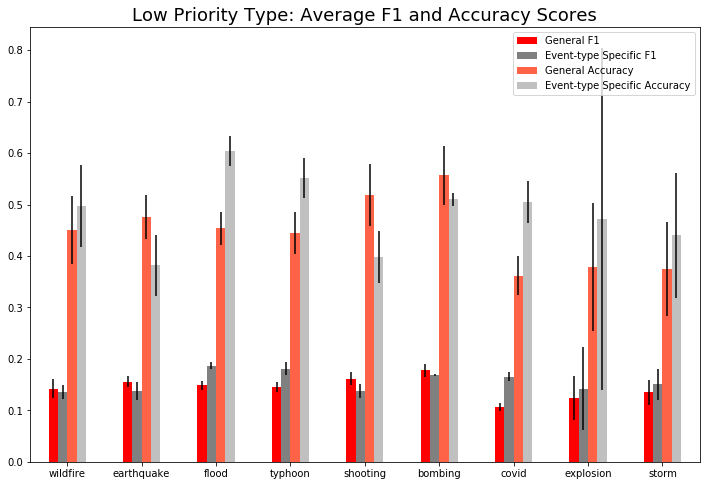

In [6]:
visualize(prioDF, "Critical")
visualize(prioDF, "High")
visualize(prioDF, "Medium")
visualize(prioDF, "Low")

In [7]:
def visualize_F1(prioDF, priority_type):
    DF = isolate(prioDF, priority_type)
    
    genF1 = [item for item in DF['avgF1Gen' + priority_type]]
    specF1 = [item for item in DF['avgF1Spec' + priority_type]]
    ste_gen = [item for item in DF['semF1Gen' + priority_type]]
    ste_spec = [item for item in DF['semF1Spec' + priority_type]]
    index = [item for item in DF.index]

    name = priority_type + "_DF"
    
    name = pd.DataFrame({'{} General F1'.format(priority_type): genF1,

                   '{} Event-type Specific F1'.format(priority_type): specF1, 
                        '{} SEM General F1'.format(priority_type): ste_gen, 
                        '{} SEM Specific F1'.format(priority_type): ste_spec},
                        index=index)
    return name

In [8]:
a = visualize_F1(prioDF, "Critical")
b = visualize_F1(prioDF, "High")
c = visualize_F1(prioDF, "Medium")
d = visualize_F1(prioDF, "Low")

dataframe = pd.concat([a,b,c,d], axis=1)
dataframe

,Critical General F1,Critical Event-type Specific F1,Critical SEM General F1,Critical SEM Specific F1,High General F1,High Event-type Specific F1,High SEM General F1,High SEM Specific F1,Medium General F1,Medium Event-type Specific F1,Medium SEM General F1,Medium SEM Specific F1,Low General F1,Low Event-type Specific F1,Low SEM General F1,Low SEM Specific F1
wildfire,0.127141,0.363587,0.103123,0.318207,0.106043,0.072233,0.028348,0.024267,0.130968,0.075857,0.036801,0.017931,0.141600,0.135500,0.018419,0.013862
earthquake,0.006173,0.040757,0.006173,0.018206,0.132990,0.133164,0.026445,0.033712,0.136921,0.129914,0.036246,0.029558,0.155774,0.137451,0.010717,0.017244
flood,0.131420,0.125100,0.108862,0.049040,0.111624,0.108385,0.016571,0.009917,0.115905,0.091099,0.019803,0.021494,0.148776,0.187123,0.008509,0.005928
typhoon,0.012844,0.035666,0.007574,0.014276,0.104312,0.116379,0.012384,0.020782,0.141466,0.130507,0.029034,0.019429,0.145295,0.181211,0.009943,0.012084
shooting,0.064464,0.060462,0.028232,0.019836,0.091062,0.068170,0.018862,0.013020,0.220437,0.122573,0.089136,0.023204,0.161721,0.137853,0.012996,0.013711
bombing,0.083586,0.041667,0.041794,0.026515,0.110299,0.094070,0.015654,0.036605,0.130975,0.069440,0.017466,0.019104,0.177861,0.168803,0.012254,0.002790
covid,0.005319,0.000000,0.005319,0.000000,0.072371,0.054134,0.014375,0.013416,0.143802,0.127181,0.006914,0.008965,0.106401,0.165463,0.007985,0.009190
explosion,0.030303,0.113636,0.030303,0.053030,0.104779,0.139474,0.042279,0.106140,0.137005,0.103175,0.020338,0.007937,0.124148,0.141949,0.043060,0.081024
storm,0.055771,0.060050,0.037252,0.008326,0.150199,0.156474,0.000564,0.021379,0.155279,0.069822,0.002615,0.005555,0.134750,0.150350,0.024405,0.029544


In [9]:
priority_types = ["Critical", "High", "Medium", "Low"]

def mega_visualize(dataframe, priority_types):
    DF = dataframe
    index = [item for item in DF.index]

    plt.figure(figsize=(20, 10))
    ax = plt.axes()
    
    dictionary = {}
    keys = ["General F1", "Event-type Specific F1"]
    for priority in priority_types:
        for key in keys:
            col = '{} {}'.format(priority, key)
            dictionary[col] = [item for item in dataframe[col]]
            
    error_list = []
    error_keys = ["SEM General F1", "SEM Specific F1"]
    for priority in priority_types:
        for key in error_keys:
            col = '{} {}'.format(priority, key)
            error_list.append([item for item in dataframe[col]])
    
    df_prio = pd.DataFrame(dictionary, index=index)
    
    ax.set_title('Priority Types: Average F1 Scores', fontsize = 18)
    ax = df_prio.plot.bar(rot=0, ax=ax, yerr = error_list,
                      color=['maroon', 'lightcoral', 'red', 'mistyrose','orangered', 'lightsalmon',
                             'darkorange', 'bisque'], edgecolor='black', 
                          width=.75, linewidth=.25)
    
    plt.show()

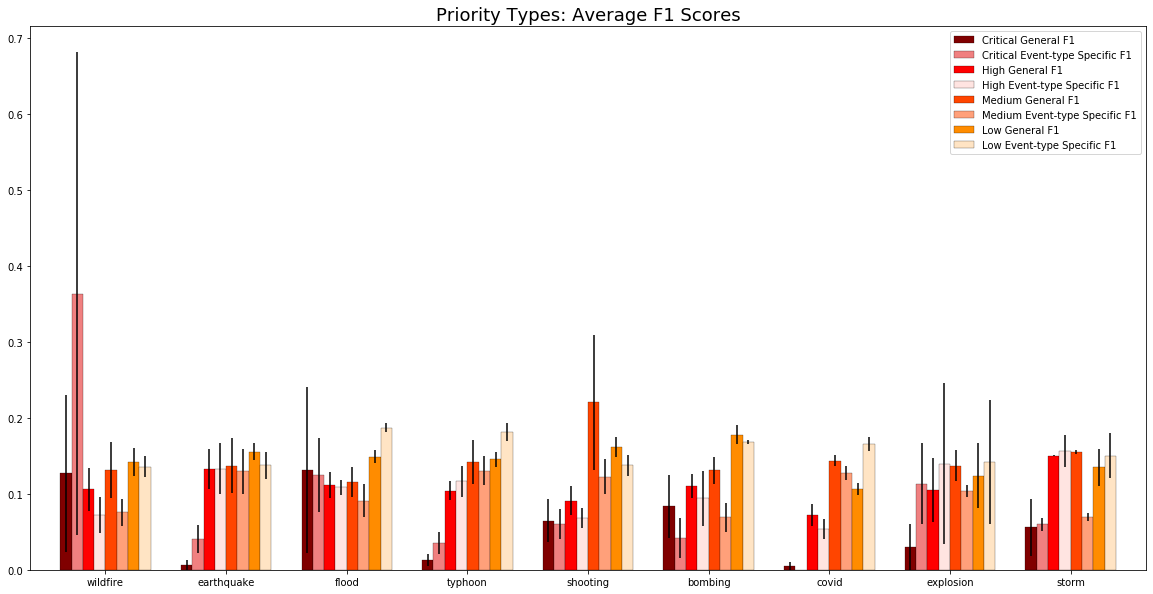

In [10]:
mega_visualize(dataframe, priority_types)

In [41]:
#Archived standard error post-calculation
prioDF['n'] = [5, 11, 12, 13, 10, 3, 2]

ste_prio_gen = []
ste_prio_spec = []
ste_prio_genacc = []
ste_prio_specacc = []


for row in prioDF.itertuples():
    F1Gen = row.stdF1Gen
    F1Spec = row.stdF1Spec
    F1Genacc = row.stdAccGen
    F1Specacc = row.stdAccSpec
    steGen = F1Gen / sqrt(row.n)
    steSpec = F1Spec / sqrt(row.n)
    steGenacc = F1Genacc / sqrt(row.n)
    steSpecacc = F1Specacc / sqrt(row.n)
    ste_prio_gen.append(steGen)
    ste_prio_spec.append(steSpec)
    ste_prio_genacc.append(steGenacc)
    ste_prio_specacc.append(steSpecacc)
    print('Priority Event:', row[0], 'Gen:', steGen, 'Spec:', steSpec, 'GenAcc:', steGenacc, 'SpecAcc:', steSpecacc)


AttributeError: 'Pandas' object has no attribute 'stdF1Gen'

## Categories

In [56]:
catDF = pd.read_json("catScoreDF.json")
#catDF['n'] = [5, 11, 12, 13, 10, 3, 2]

''' ARCHIVE

ste_cat_gen = []
ste_cat_spec = []

#standard error

for row in catDF.itertuples():
    F1Gen = row.stdF1Gen
    F1Spec = row.stdF1Spec
    steGen = F1Gen / sqrt(row.n)
    steSpec = F1Spec / sqrt(row.n)
    ste_cat_gen.append(steGen)
    ste_cat_spec.append(steSpec)
    print('Event:', row[0], 'Gen:', steGen, 'Spec:', steSpec)
    
    '''

In [65]:
catDF.index

Index(['wildfire', 'earthquake', 'flood', 'typhoon', 'shooting', 'bombing',
       'covid', 'explosion', 'storm'],
      dtype='object')

In [66]:
def visualize_cat(catDF):    
    plt.figure(figsize=(12, 8))
    ax = plt.axes()
    
    genF1 = [item for item in catDF['avgF1Gen']]
    specF1 = [item for item in catDF['avgF1Spec']]
    ste_gen = [item for item in catDF['semF1Gen']]
    ste_spec = [item for item in catDF['semF1Spec']]
    index = [item for item in catDF.index]

    df_prio = pd.DataFrame({'General F1': genF1,

                   'Event-type Specific F1': specF1}, index=index)

    ax.set_title('Information Types: Average F1 Scores', fontsize = 18)
    ax = df_prio.plot.bar(rot=0, ax=ax, yerr = [ste_gen, ste_spec], color=['red', 'darkgrey'])

    plt.show()

visualize_cat(catDF)

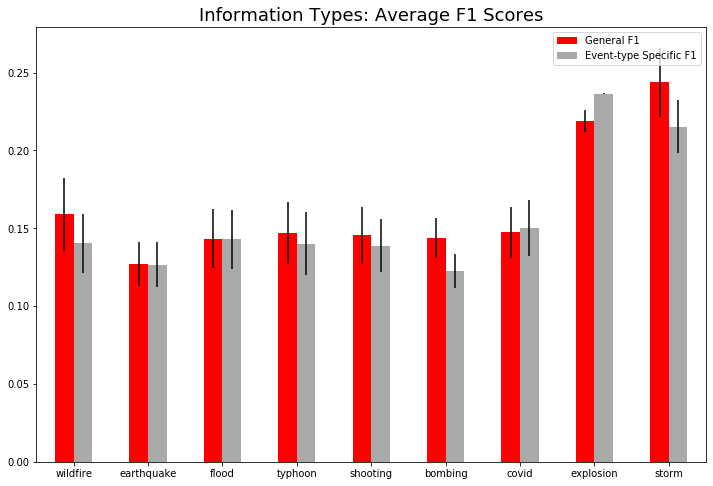

In [67]:
visualize_cat(catDF)

# Q1

In [27]:
info_ranks = pd.read_csv("final_final_info_ranks.csv", index_col = 0)
event_ranks = pd.read_csv('final_final_event_ranks.csv', index_col = 0)
critical_ranks = pd.read_csv("./Trec_data/critical_ranks.csv", index_col = 0)
critical_ranks = critical_ranks.drop(columns=['Unknown'])

#color selection

print("Colormap dark:salmon is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r")

Colormap dark:salmon is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_st

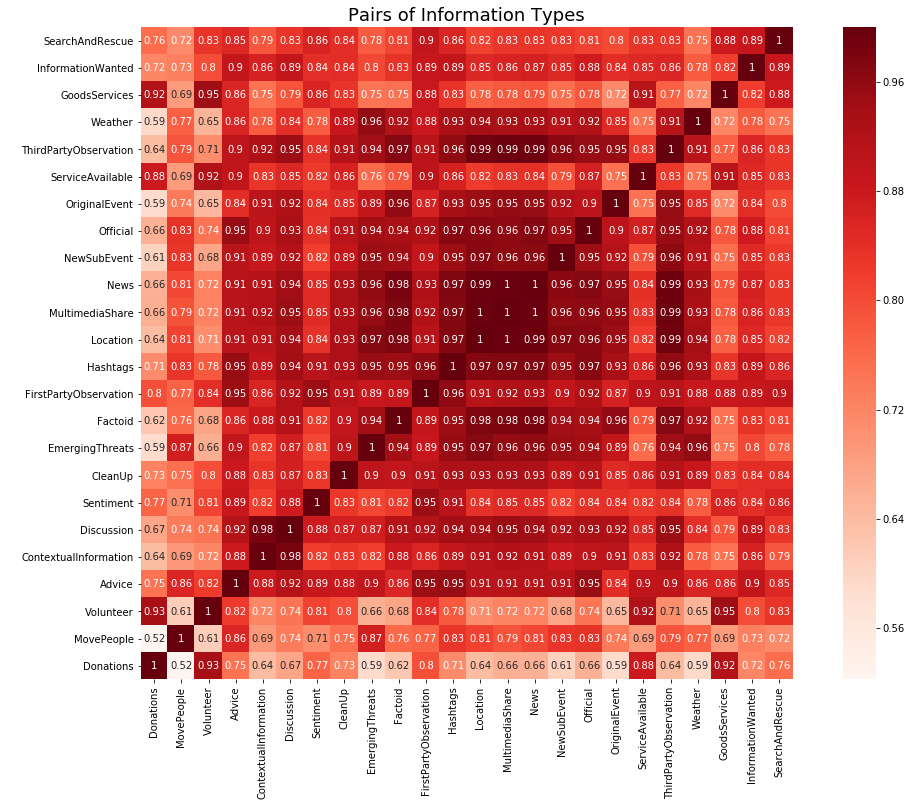

In [28]:
#similarity matrices

#info types
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))

ax = plt.axes()

ax.set_title('Pairs of Information Types', fontsize = 18)

sns.heatmap(info_ranks, ax=ax,cmap="Reds", annot=True, square=True)
plt.ylabel(' ')
#sns.heatmap(dt_tweet_cnt, ax=ax2)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

plt.show()

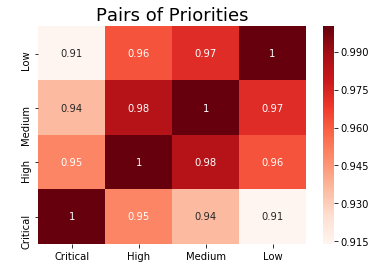

In [24]:
#priority
plt.figure(figsize=(6, 4))

ax = plt.axes()

ax.set_title('Pairs of Priorities', fontsize=18)
sns.heatmap(critical_ranks, ax=ax,cmap="Reds", annot=True)
plt.ylabel(' ')
#sns.heatmap(dt_tweet_cnt, ax=ax2)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

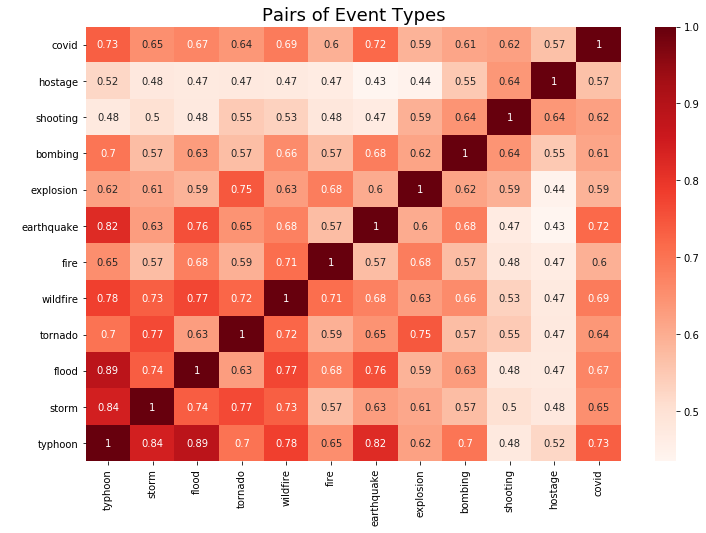

In [29]:
#events
plt.figure(figsize=(12, 8))

ax = plt.axes()

ax.set_title('Pairs of Event Types', fontsize=18)
sns.heatmap(event_ranks, ax=ax,cmap="Reds", annot=True)
plt.ylabel(' ')
#sns.heatmap(dt_tweet_cnt, ax=ax2)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

## Significance testing priority types

In [30]:
from math import sqrt
from numpy import dot
from numpy.linalg import norm
import random

In [32]:
infile = open('with_bombing','rb')
df = pickle.load(infile)
infile.close()
df

,eventID,eventType,postID,postCategories,postPriority,postText,contributors,contributorsIDs,coordinates,createdAt,...,text,timestamp_ms,topic,truncated,urlEntities,user,userMentionEntities,withheld_in_countries,processed_text,sbert_emb
0,fireColorado2012,wildfire,212365530391252993,[Factoid],Low,"The High Park fire west of Fort Collins, #CO h...",NaN,None,None,None,...,"The High Park fire west of Fort Collins, #CO h...",NaT,TRECIS-CTIT-H-001,0.0,None,"{'location': 'United States', 'default_profile...",None,None,"[high, park, fire, west, fort_collin, consume,...","[0.7833897, 0.4475655, -0.6625698, 0.60922027,..."
1,fireColorado2012,wildfire,217744670753689603,[MultimediaShare],Low,Pic of the #FlagstaffFire in boulder from our ...,NaN,None,"{'type': 'Point', 'coordinates': [-105.1348135...",None,...,Pic of the #FlagstaffFire in boulder from our ...,NaT,TRECIS-CTIT-H-001,0.0,None,"{'location': 'Erie, Co', 'default_profile': Tr...",None,None,"[pic, flagstafffire, boulder, apt, tbydkaxb]","[0.010711178, -0.19763231, -0.34852412, 0.8226..."
2,fireColorado2012,wildfire,212311994286620672,[MultimediaShare],Unknown,RT @CBSDenver: The copter is on the way to the...,NaN,None,None,None,...,RT @CBSDenver: The copter is on the way to the...,NaT,TRECIS-CTIT-H-001,0.0,None,"{'location': 'Boulder, Colorado', 'default_pro...",None,None,"[copter, way, highparkfire, well, air, live, c...","[-0.74097896, 0.9875894, -0.042316787, 0.17517..."
3,fireColorado2012,wildfire,217030749856088066,[],Low,I have it on good authority that most of Color...,NaN,None,None,None,...,I have it on good authority that most of Color...,NaT,TRECIS-CTIT-H-001,0.0,None,"{'location': 'Louisville, KY', 'default_profil...",None,None,"[good, authority, colorado, front, range, fire...","[0.23670046, 1.1524885, 0.022244314, 0.0050623..."
4,fireColorado2012,wildfire,217746356842926080,[MultimediaShare],Medium,RT @ColoradoRapids: Photo of #FlagStaffFire in...,NaN,None,None,None,...,RT @ColoradoRapids: Photo of #FlagStaffFire in...,NaT,TRECIS-CTIT-H-001,0.0,None,"{'location': 'Denver', 'default_profile': Fals...",None,None,"[photo, flagstafffire, boulder, see, pm, mt, m...","[-0.81128556, 1.0994077, 0.62657094, 0.4951987..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72467,covidNewZealand2020,covid,1295668332461322242,"[ThirdPartyObservation, Location, NewSubEvent,...",Medium,@TLagomars @MovingToEnZed Nope.\nhttps://t.co/...,NaN,None,None,None,...,None,NaT,TRECIS-CTIT-H-075,0.0,None,"{'id': 21260922, 'id_str': '21260922', 'name':...",None,None,"[nope, csgwelg]","[-0.0197716, 0.6021651, -0.12217062, 0.2699645..."
72468,covidNewZealand2020,covid,1296006183178784768,"[FirstPartyObservation, MultimediaShare, Advice]",Low,Its personal choice to wear a mask\nDon't put ...,NaN,None,None,None,...,None,NaT,TRECIS-CTIT-H-075,0.0,None,"{'id': 783147530884227072, 'id_str': '78314753...",None,None,"[personal, choice, wear_mask, put, use, keep_s...","[-0.9820343, -0.98338723, -0.6184144, -0.35399..."
72470,houstonExplosion2020,explosion,1220704310520094720,"[ThirdPartyObservation, Location, EmergingThre...",Low,Um. Jon? You get jolted awake early this morni...,NaN,None,None,None,...,Um. Jon? You get jolted awake early this morni...,2020-01-24 13:46:01.874,TRECIS-CTIT-H-076,0.0,None,"{'id': 20885534, 'id_str': '20885534', 'name':...",None,None,"[jon, get, jolt, awake, early, morning, nmutlmht]","[0.35711387, -0.88471466, -0.051269475, 0.8173..."
72471,texasAMCommerceShooting2020,shooting,1224419435043123200,"[ThirdPartyObservation, Location, MultimediaSh...",Low,"2 dead, 1 hurt in shooting at college residenc...",NaN,None,None,None,...,"2 dead, 1 hurt in shooting at college residenc...",2020-02-03 19:48:36.584,TRECIS-CTIT-H-078,0.0,None,"{'id': 282685004, 'id_str': '282685004', 'name...",None,None,"[dead_hurt, shoot, rxo, hectm, smartnews]","[0.97791696, -0.16704077, -0.644486, -0.230477..."


In [33]:
low = []
med = []
high = []
critical = []

for row in df.itertuples():
    postPriority = row.postPriority
    text = row.sbert_emb
    
    if postPriority == 'Low':
        low.append(np.array(text))
        
    elif postPriority == 'Medium':
        med.append(np.array(text))
        
    elif postPriority == 'High':
        high.append(np.array(text))
        
    elif postPriority == 'Critical':
        critical.append(np.array(text))
        
Low = pd.DataFrame()
Low['text'] = [item for item in low]

Med = pd.DataFrame()
Med['text'] = [item for item in med]

High = pd.DataFrame()
High['text'] = [item for item in high]

Critical = pd.DataFrame()
Critical['text'] = [item for item in critical]

In [34]:
def critical_dist(lst1, lst2, dist_name):
    dist_name = []
    for i in range(1000): #make this larger when done

        index1 = random.choice(range(len(lst1)))
        index2 = random.choice(range(len(lst2)))
        
        grp1 = lst1['text'][index1]
        grp2 = lst2['text'][index2]
        
        #print(grp1, grp2)
        cos_sim = dot(grp1,grp2)/(norm(grp1)*norm(grp2))
        #print("cos_sim:", cos_sim)
        dist_name.append(cos_sim)
    return dist_name

In [35]:
cc = []
cc_dist = critical_dist(Critical, Critical, cc)

ch = []
ch_dist = critical_dist(Critical, High, ch)

cm = []
cm_dist = critical_dist(Critical, Med, cm)

cl = []
cl_dist = critical_dist(Critical, Low, cl)

ll = []
ll_dist = critical_dist(Low, Low, ll)

lm = []
lm_dist = critical_dist(Low, Med, lm)

<BarContainer object of 5 artists>

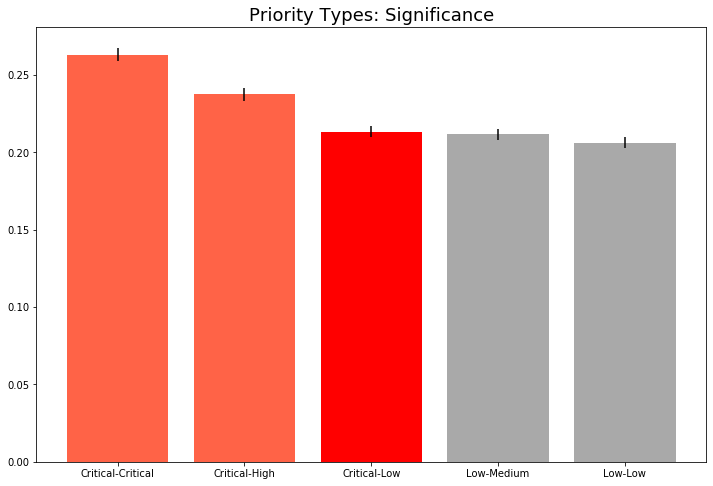

In [36]:

plt.figure(figsize=(12, 8))
ax = plt.axes()
ax.set_title('Priority Types: Significance', fontsize = 18)

mean0 = np.mean(cc_dist)
ste0 = np.std(cc_dist) / sqrt(len(cc_dist))

mean = np.mean(ch_dist)
ste = np.std(ch_dist) / sqrt(len(ch_dist))

mean2 = np.mean(cl_dist)
ste2 = np.std(cl_dist) / sqrt(len(cl_dist))

mean3 = np.mean(lm_dist)
ste3 = np.std(lm_dist) / sqrt(len(lm_dist))

mean4 = np.mean(ll_dist)
ste4 = np.std(ll_dist) / sqrt(len(ll_dist))

plt.bar(['Critical-Critical', 'Critical-High', 'Critical-Low', 'Low-Medium', 'Low-Low'], 
        [mean0, mean, mean2, mean3, mean4], yerr=[ste0, ste, ste2, ste3, ste4], color=['tomato', 'tomato', 
                                                                                'r', 'darkgrey', 'darkgrey'])

# Q3

In [37]:
import scipy.cluster.hierarchy as sch
import seaborn as sns

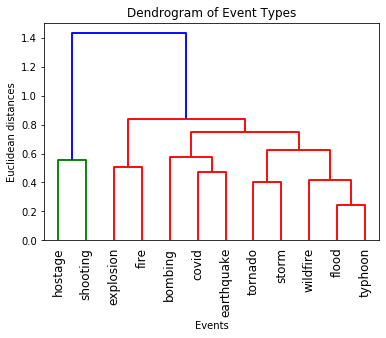

In [46]:
dendrogram = sch.dendrogram(sch.linkage(event_ranks, method  = "ward"))

labels = ['hostage', 'shooting', 'explosion', 'fire', 'bombing', 'covid',  'earthquake', 'tornado', 
          'storm', 'wildfire', 'flood', 'typhoon']

temp = {dendrogram["leaves"][ii]: labels[ii] for ii in range(len(dendrogram["leaves"]))}

def llf(xx):
    return "{}".format(temp[xx])

dendrogram = sch.dendrogram(sch.linkage(event_ranks, method  = "ward"), leaf_label_func=llf, leaf_rotation=90)

plt.title('Dendrogram of Event Types')
plt.xlabel('Events')
plt.ylabel('Euclidean distances')
plt.show()

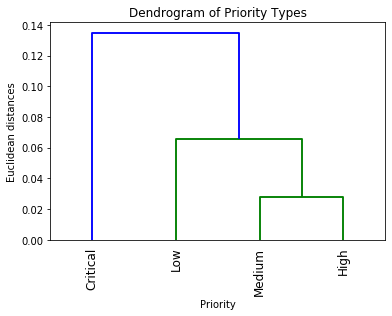

In [50]:
priority_dend = sch.dendrogram(sch.linkage(critical_ranks, method  = "ward"))

labels = ["Critical", "Low", "Medium", "High"]
temp = {priority_dend["leaves"][ii]: labels[ii] for ii in range(len(priority_dend["leaves"]))}

def llf(xx):
    return "{}".format(temp[xx])
    
priority_dend = sch.dendrogram(sch.linkage(critical_ranks, method  = "ward"), leaf_label_func=llf, leaf_rotation=90)


plt.title('Dendrogram of Priority Types')
plt.xlabel('Priority')
plt.ylabel('Euclidean distances')
plt.show()

In [51]:
info_ranks

,Donations,MovePeople,Volunteer,Advice,ContextualInformation,Discussion,Sentiment,CleanUp,EmergingThreats,Factoid,...,News,NewSubEvent,Official,OriginalEvent,ServiceAvailable,ThirdPartyObservation,Weather,GoodsServices,InformationWanted,SearchAndRescue
reference-group,,,,,,,,,,,,,,,,,,,,,
SearchAndRescue,0.755778,0.715762,0.830556,0.852765,0.786723,0.832823,0.861456,0.842100,0.780639,0.809040,...,0.831175,0.825590,0.811879,0.801523,0.831116,0.829442,0.747922,0.878694,0.886178,1.000000
InformationWanted,0.719286,0.728314,0.800088,0.895514,0.864432,0.893216,0.840349,0.844547,0.804497,0.834979,...,0.866997,0.851107,0.876624,0.844382,0.851516,0.857501,0.779598,0.819953,1.000000,0.886178
GoodsServices,0.916188,0.688157,0.945848,0.857304,0.747825,0.788132,0.859881,0.833747,0.745897,0.753147,...,0.787438,0.754170,0.784397,0.715687,0.908741,0.772972,0.718466,1.000000,0.819953,0.878694
Weather,0.593643,0.773302,0.652824,0.858801,0.779302,0.840668,0.779809,0.886802,0.956185,0.920643,...,0.934713,0.911112,0.920603,0.849597,0.751924,0.908478,1.000000,0.718466,0.779598,0.747922
ThirdPartyObservation,0.640906,0.790089,0.707833,0.900121,0.923975,0.947818,0.836604,0.914689,0.942350,0.971471,...,0.991179,0.963263,0.952444,0.952802,0.825140,1.000000,0.908478,0.772972,0.857501,0.829442
ServiceAvailable,0.877688,0.687225,0.923217,0.897520,0.832272,0.853784,0.822858,0.862296,0.760512,0.788700,...,0.838048,0.794887,0.868487,0.750748,1.000000,0.825140,0.751924,0.908741,0.851516,0.831116
OriginalEvent,0.591055,0.738078,0.645966,0.844807,0.905120,0.923691,0.839307,0.849156,0.892546,0.957954,...,0.952946,0.916942,0.903540,1.000000,0.750748,0.952802,0.849597,0.715687,0.844382,0.801523
Official,0.657936,0.834824,0.744523,0.950290,0.901228,0.929150,0.837349,0.907163,0.942141,0.935189,...,0.971129,0.945855,1.000000,0.903540,0.868487,0.952444,0.920603,0.784397,0.876624,0.811879
NewSubEvent,0.606380,0.831450,0.675423,0.910388,0.888536,0.919421,0.818624,0.892092,0.947176,0.942557,...,0.962868,1.000000,0.945855,0.916942,0.794887,0.963263,0.911112,0.754170,0.851107,0.825590


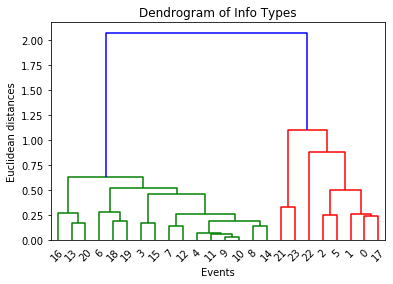

In [53]:
info_dend = sch.dendrogram(sch.linkage(info_ranks, method  = "ward"))

plt.title('Dendrogram of Info Types')
plt.xlabel('Events')
plt.ylabel('Euclidean distances')
plt.show()

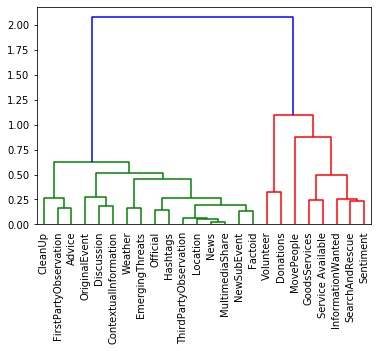

In [54]:
labels = ["CleanUp", "FirstPartyObservation", "Advice", "OriginalEvent", "Discussion", "ContextualInformation", 
        "Weather", "EmergingThreats", "Official", "Hashtags", "ThirdPartyObservation", "Location", 
        "News", "MultimediaShare", "NewSubEvent", "Factoid", "Volunteer", "Donations", "MovePeople", "GoodsServices",
        "Service Available", "InformationWanted", "SearchAndRescue", "Sentiment"]
temp = {info_dend["leaves"][ii]: labels[ii] for ii in range(len(info_dend["leaves"]))}

info_dend = sch.dendrogram(sch.linkage(info_ranks, method  = "ward"), leaf_label_func=llf, leaf_rotation=90)